In [1]:
%matplotlib inline 
import sys, os
base_path = os.getcwd()[0:os.getcwd().rfind('Watermark')] + "Watermark/"
sys.path.append(base_path) 

import matplotlib.pyplot as plt
from src.main import generate_usenix_property_inference_attack

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


# Description
In this notebook we explore a property inference attack on networks trained on the MNIST dataset. We try to find out why the network performs so well.  

In [2]:
property_inference_model, all_history = generate_usenix_property_inference_attack(epochs=7,
                                              training_data_size=150,
                                              train_to_test_ratio=0.8,
                                              batchsize=32,
                                              path_to_models='/home/nlukas/Watermark/models/property_inference/',
                                              verbose=True)

[1/2] Loading models from storage
[2/2] Training the property inference model
Instructions for updating:
Use tf.cast instead.
Train on 240 samples, validate on 60 samples
Epoch 1/7
240/240 [==============================] - 1s 3ms/step - loss: 0.6837 - acc: 0.7042 - val_loss: 0.6595 - val_acc: 0.9500
Epoch 2/7
240/240 [==============================] - 0s 245us/step - loss: 0.6351 - acc: 0.9750 - val_loss: 0.5845 - val_acc: 0.9500
Epoch 3/7
240/240 [==============================] - 0s 347us/step - loss: 0.5348 - acc: 0.9833 - val_loss: 0.4534 - val_acc: 0.9667
Epoch 4/7
240/240 [==============================] - 0s 279us/step - loss: 0.3871 - acc: 0.9750 - val_loss: 0.3128 - val_acc: 0.9833
Epoch 5/7
240/240 [==============================] - 0s 252us/step - loss: 0.2242 - acc: 1.0000 - val_loss: 0.1655 - val_acc: 0.9667
Epoch 6/7
240/240 [==============================] - 0s 298us/step - loss: 0.1291 - acc: 0.9833 - val_loss: 0.1062 - val_acc: 0.9833
Epoch 7/7
240/240 [==============

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


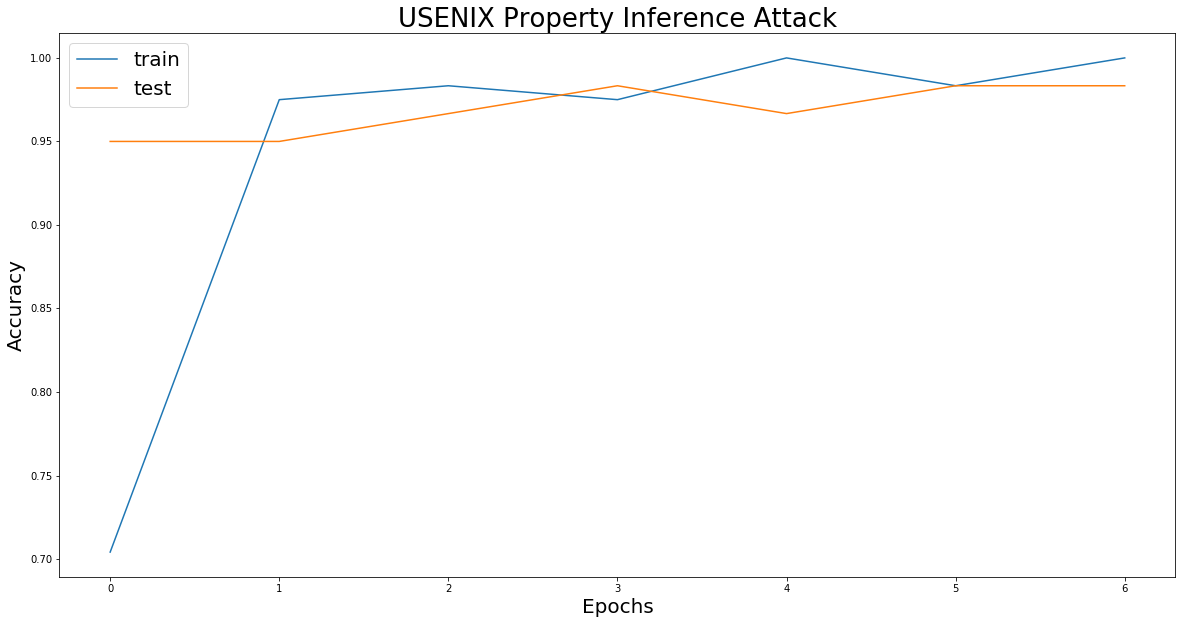

In [3]:
print(all_history.history.keys())

plt.figure(figsize=(20,10))
params = {'legend.fontsize': 20,
          'legend.handlelength': 2}
plt.rcParams.update(params)

plt.title('USENIX Property Inference Attack', fontsize=26)
plt.xlabel('Epochs', fontsize=20)
plt.ylabel('Accuracy', fontsize=20)

plt.plot(all_history.history['acc'])
plt.plot(all_history.history['val_acc'])

plt.legend(['train', 'test'], loc='best')
plt.show()

# Analysis
Plot the training samples as images 

In [4]:
from src.usenix import load_trained_models_from_storage

X,y, wm_X, wm_y = load_trained_models_from_storage("/home/nlukas/Watermark/models/property_inference/")

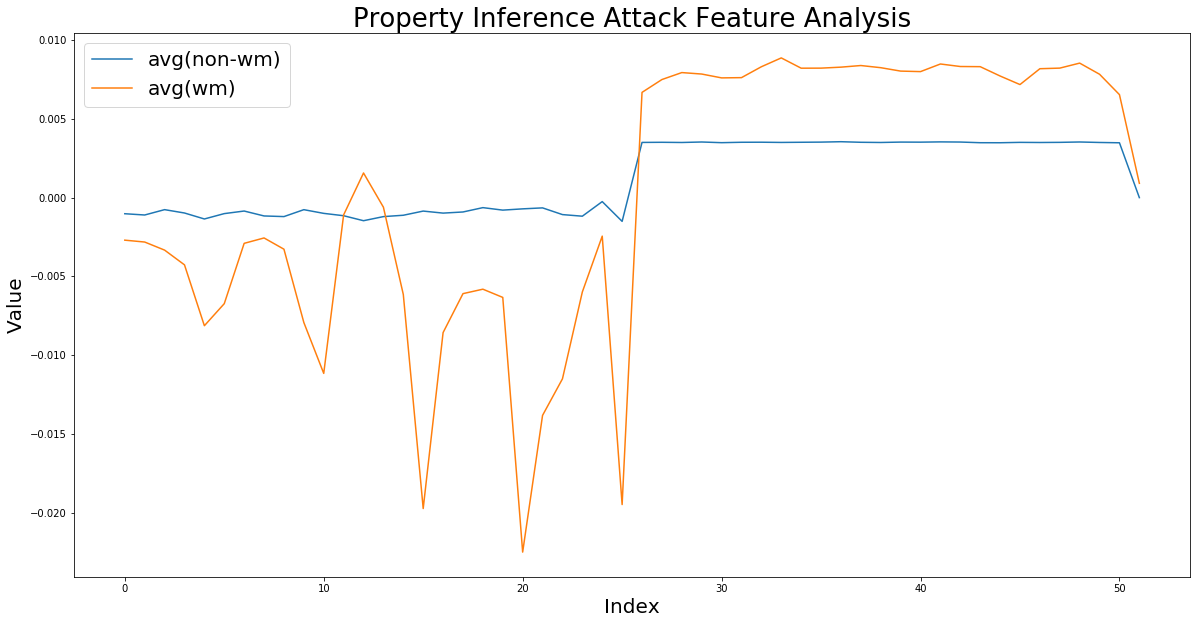

In [5]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(20,10))
params = {'legend.fontsize': 20,
          'legend.handlelength': 2}
plt.rcParams.update(params)

plt.title('Property Inference Attack Feature Analysis', fontsize=26)
plt.xlabel('Index', fontsize=20)
plt.ylabel('Value', fontsize=20)

plt.plot(np.average(X, axis=0), rasterized=True)
plt.plot(np.average(wm_X, axis=0), rasterized=True)

plt.legend(['avg(non-wm)', 'avg(wm)'], loc='best')



# Defense Idea Number 1:
Embed the watermark with regularization and compare it with the activations from a non-wm model

In [6]:
from src.main import generate_usenix_watermarked_model_mnist, generate_usenix_surrogate_model_mnist

In [7]:
# Train a watermarked model with regularization
wm_model_reg, history_wm_reg, trigger_reg = generate_usenix_watermarked_model_mnist(epochs=5,
                                            keylength=35,
                                            wm_boost_factor=100,
                                            mnist_train_size=0.8,
                                            owner_data_size=35000,
                                            reg=0.05)

Train on 38500 samples, validate on 14000 samples
Epoch 1/5
38500/38500 [==============================] - 62s 2ms/step - loss: 2.3491 - acc: 0.7722 - val_loss: 1.4486 - val_acc: 0.8496
Epoch 2/5
38500/38500 [==============================] - 60s 2ms/step - loss: 1.5023 - acc: 0.8243 - val_loss: 1.3207 - val_acc: 0.8899
Epoch 3/5
38500/38500 [==============================] - 60s 2ms/step - loss: 1.4627 - acc: 0.8351 - val_loss: 1.3412 - val_acc: 0.8802
Epoch 4/5
38500/38500 [==============================] - 59s 2ms/step - loss: 1.4469 - acc: 0.8377 - val_loss: 1.3015 - val_acc: 0.8961
Epoch 5/5
38500/38500 [==============================] - 59s 2ms/step - loss: 1.4350 - acc: 0.8426 - val_loss: 1.3029 - val_acc: 0.8929


In [8]:
# Train a watermarked model without regularization
wm_model_no_reg, history_wm_no_reg, trigger_no_reg = generate_usenix_watermarked_model_mnist(epochs=5,
                                            keylength=35,
                                            wm_boost_factor=100,
                                            mnist_train_size=0.8,
                                            owner_data_size=35000,
                                            reg=0)

Train on 38500 samples, validate on 14000 samples
Epoch 1/5
38500/38500 [==============================] - 58s 2ms/step - loss: 0.1756 - acc: 0.9453 - val_loss: 0.0508 - val_acc: 0.9839
Epoch 2/5
38500/38500 [==============================] - 58s 2ms/step - loss: 0.0476 - acc: 0.9854 - val_loss: 0.0543 - val_acc: 0.9833
Epoch 3/5
38500/38500 [==============================] - 58s 1ms/step - loss: 0.0348 - acc: 0.9893 - val_loss: 0.0473 - val_acc: 0.9853
Epoch 4/5
38500/38500 [==============================] - 58s 2ms/step - loss: 0.0246 - acc: 0.9928 - val_loss: 0.0455 - val_acc: 0.9874
Epoch 5/5
38500/38500 [==============================] - 57s 1ms/step - loss: 0.0200 - acc: 0.9940 - val_loss: 0.0375 - val_acc: 0.9896


In [9]:
# Train a non-watermarked model
model_no_reg, history_no_reg, trigger_no_reg = generate_usenix_watermarked_model_mnist(epochs=5,
                                            keylength=0,
                                            wm_boost_factor=100,
                                            mnist_train_size=0.8,
                                            owner_data_size=35000,
                                            reg=0)

Train on 35000 samples, validate on 14000 samples
Epoch 1/5
35000/35000 [==============================] - 55s 2ms/step - loss: 0.1554 - acc: 0.9527 - val_loss: 0.0660 - val_acc: 0.9795
Epoch 2/5
35000/35000 [==============================] - 53s 2ms/step - loss: 0.0473 - acc: 0.9856 - val_loss: 0.0532 - val_acc: 0.9846
Epoch 3/5
35000/35000 [==============================] - 53s 2ms/step - loss: 0.0343 - acc: 0.9892 - val_loss: 0.0490 - val_acc: 0.9869
Epoch 4/5
35000/35000 [==============================] - 53s 2ms/step - loss: 0.0233 - acc: 0.9925 - val_loss: 0.0719 - val_acc: 0.9787
Epoch 5/5
35000/35000 [==============================] - 53s 2ms/step - loss: 0.0202 - acc: 0.9940 - val_loss: 0.0581 - val_acc: 0.9852


dict_keys(['val_loss', 'val_acc', 'loss', 'acc', 'watermark_loss', 'watermark_val'])
dict_keys(['val_loss', 'val_acc', 'loss', 'acc', 'watermark_loss', 'watermark_val'])
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


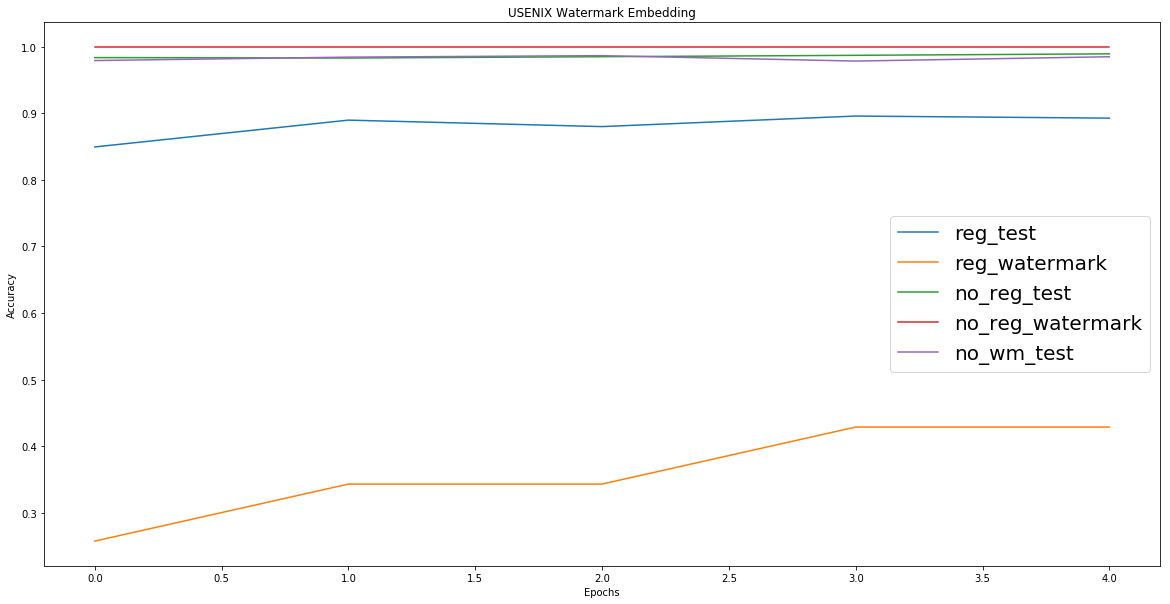

In [10]:
# Plot all training results 
all_history = [history_wm_reg, history_wm_no_reg, history_no_reg]

for history in all_history: 
    print(history.history.keys())

plt.figure(figsize=(20,10))
params = {'legend.fontsize': 20,
          'legend.handlelength': 2}
plt.rcParams.update(params)

plt.title('USENIX Watermark Embedding')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.plot(history_wm_reg.history['val_acc'])
plt.plot(history_wm_reg.history['watermark_val'])

plt.plot(history_wm_no_reg.history['val_acc'])
plt.plot(history_wm_no_reg.history['watermark_val'])

plt.plot(history_no_reg.history['val_acc'])

plt.legend(['reg_test', 'reg_watermark', 'no_reg_test', 'no_reg_watermark', 'no_wm_test'], loc='best')
plt.show()

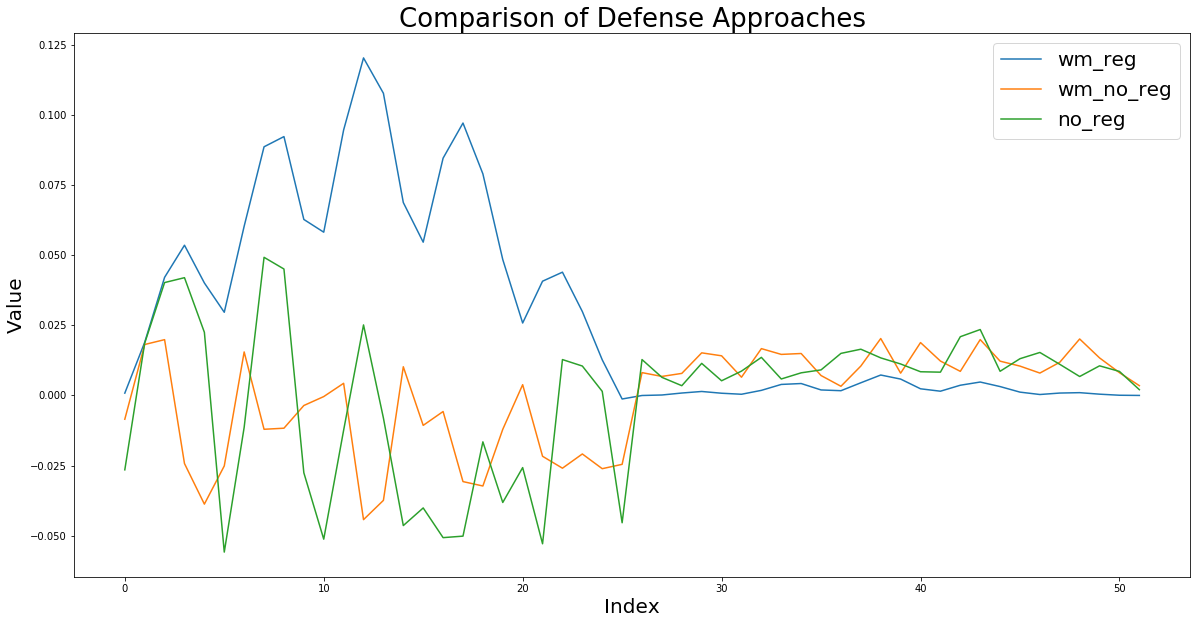

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from src.usenix import extract_features_conv2d

if not (wm_model_reg and wm_model_no_reg and model_no_reg):
    print("Please train the models first!")
    exit()

plt.figure(figsize=(20,10))
params = {'legend.fontsize': 20,
          'legend.handlelength': 2}
plt.rcParams.update(params)

features_wm_reg = extract_features_conv2d(wm_model_reg.get_layer(index=0))
features_wm_no_reg = extract_features_conv2d(wm_model_no_reg.get_layer(index=0))
features_no_reg = extract_features_conv2d(model_no_reg.get_layer(index=0))

plt.title('Comparison of Defense Approaches', fontsize=26)
plt.xlabel('Index', fontsize=20)
plt.ylabel('Value', fontsize=20)

plt.plot(features_wm_reg, rasterized=True)
plt.plot(features_wm_no_reg, rasterized=True)
plt.plot(features_no_reg, rasterized=True)

plt.legend(['wm_reg', 'wm_no_reg', 'no_reg'], loc='best')

In [12]:
print(property_inference_model.predict(np.expand_dims(features_wm_reg, axis=0)))
print(property_inference_model.predict(np.expand_dims(features_wm_no_reg, axis=0)))
print(property_inference_model.predict(np.expand_dims(features_no_reg, axis=0)))

[[3.7499979e-06]]
[[0.999332]]
[[0.9998022]]
